In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/akalinow/uczenie-maszynowe-2021-22
df = pd.read_csv("uczenie-maszynowe-2021-22/dane/reg_log_data.txt", encoding='latin-1', sep=",", names=["matematyka", "biologia", "wynik"])

fatal: destination path 'uczenie-maszynowe-2021-22' already exists and is not an empty directory.


In [ ]:
X = df.iloc[:,[0,1]].to_numpy()
Y = df.iloc[:,2].to_numpy()
N=len(X)

In [ ]:
# Data standarization
def standarize_data(data):
    '''
    process of rescaling the values so that 
    they have mean=0 and variance=1
    '''
    return (data - np.mean(data)) / np.std(data)

# Data normalization (Min-Max scaling)
def normalize_data(data):
    '''
    process of rescaling the values so that
    they end up ranging between 0 and 1. 
    '''
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# DATASET
# import external data
data = pd.read_csv('marks.txt', header=None)
X = data.iloc[:,[0,1]].to_numpy()

# rescaling values:
X = standarize_data(X) # try also normalize_data(X)

N = len(X) # size of data

# Labels for each X(i)
Y = data.iloc[:,2].to_numpy()

# FUNCTIONS
# Nonlinear function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Loss function
def J(Y, y_hat):
    return -1/N*( np.dot(Y, np.log(y_hat)) + np.dot(1 - Y, np.log(1 - y_hat)) )

# Forward pass
def forward(W, B, predict=False):
    z = np.dot(X, W) + B
    y_hat = sigmoid(z)
    if predict: 
        return y_hat    
    # compute derivatives
    D_J_z = y_hat - Y            # DJ/Dz = (DJ/Dy_hat)*(Dy_hat/Dz)
    D_J_W = np.dot(X.T, D_J_z)   # DJ/DW = (DJ/Dy_hat)*(Dy_hat/Dz)*(Dz/DW)    
    return D_J_W/N, sum(D_J_z)/N # Note: DJ/DB = (DJ/Dz)*1

# Fit the model to data (Backpropagation)
def fit(W, B, LR, epochs):    
    for i in range(1, epochs+1):        
        D_W, D_B = forward(W, B)        
        # update weights:        
        W = W - D_W*LR
        B = B - D_B*LR
        # update loss and accuracy:
        if i%100 == 0: # every 100th iteration
            y_hat = forward(W, B, predict=True)
            acc = sum((y_hat>=0.5) == Y)/N
            loss = J(Y, y_hat)
            # save to history
            loss_history.append(loss)
            acc_history.append(acc)
    return W, B

# MAIN
# Parameters
LR = 0.01 
epochs = 800 

# Initialize randomly the learning parameters
B = np.random.normal(0, 1, (1,)) # Bias
W = np.random.normal(0, 1, (2,)) # Weights

# Save error and accuracy history
loss_history = []
acc_history = []

# Learning process
W, B = fit(W, B, LR, epochs)

# predict final results
y_hat = forward(W, B, predict=True)
print("done")    

done


[[54  6]
 [ 4 36]]
accuracy = 0.9
precision = 0.9310344827586207
recall = 0.9
F(1) score =  0.9152542372881356
F(0.5) score =  0.9246575342465755
F(2) score =  0.906040268456376


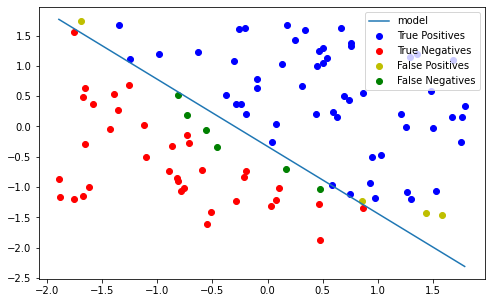

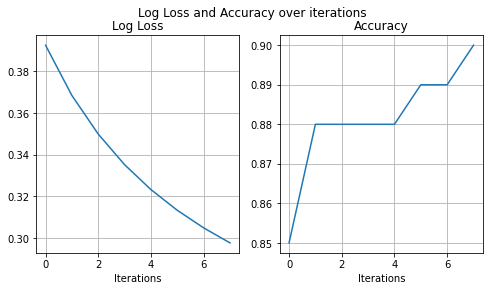

In [ ]:
# PLOT LOSS AND ACCURACY HISTORY
def plot_loss_accuracy(loss_history, acc_history):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    # add_subplot(nrows, ncolumns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_history)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc_history)
    ax.grid(True)
    ax.set(xlabel='Iterations', title='Accuracy')

# PLOT PREDICTIONS
def plot_predictions(TP, TN, FP, FN):
    fig = plt.figure(figsize=(8, 5))
    # PLOT THE MODEL
    ax = fig.add_subplot(1, 1, 1)    
    x = np.linspace(np.min(X), np.max(X), 100)
    y = (-B[0] - W[0]*x) / W[1] # m*x + b
    ax.plot(x, y, label='model')

    # True predictions
    ax.scatter(TP[:, 0], TP[:, 1], label="True Positives", c='b')
    ax.scatter(TN[:, 0], TN[:, 1], label="True Negatives", c='r')
    # False predictions
    ax.scatter(FP[:, 0], FP[:, 1], label="False Positives", c='y')
    ax.scatter(FN[:, 0], FN[:, 1], label="False Negatives", c='g')
    ax.legend() 
    #plt.show()
    
# F BETA SCORE
def F_beta_score(b, p, r):
    return (1 + b**2) * ((p*r) / ((b**2 * p) + r))

# PRINT ERROR/EVALUATION METRICS
def metrics(TP, TN, FP, FN):
    # Confusion matrix
    M = np.array([[len(TP), len(FN)], 
                  [len(FP), len(TN)]])

    # Error metrics
    accuracy = sum(np.diag(M))/N
    precision = M[0][0]/sum(M[:,0])
    recall = M[0][0]/sum(M[0,:])

    print(M)
    print("accuracy =", accuracy)
    print("precision =", precision)
    print("recall =", recall)
    print('F(1) score = ', F_beta_score(1, precision, recall))
    print('F(0.5) score = ', F_beta_score(0.5, precision, recall))
    print('F(2) score = ', F_beta_score(2, precision, recall))

# PREDICTIONS
pred1 = (y_hat >= 0.5) # True if predicted as 1
pred0 = (y_hat < 0.5)  # True if predicted as 0

TP = X[pred1 & (Y==1), :] # True positives
TN = X[pred0 & (Y==0), :] # True negatives
FP = X[pred1 & (Y==0), :] # False positives
FN = X[pred0 & (Y==1), :] # False negatives

# Display metrics
metrics(TP, TN, FP, FN)
plot_predictions(TP, TN, FP, FN)    
plot_loss_accuracy(loss_history, acc_history)